In [1]:
import matplotlib
matplotlib.use('TkAgg')
import sys
sys.path.append('python')
import keplerml
import quarterTools as qt
import clusterOutliers as coo


# Feature Calculation Example

The features caculated here are only for example purposes and these features are not used throughout the rest of this notebook. We can't host a large amount of light curves in this repository, but we do host features calculated for 20k objects from Quarter 8, which we use for the examples later.

In [2]:
path_to_filelist = './data/filelists/ex_filelist.txt'
path_to_fits = './data/lightcurves/'
output_file = 'data/output/Example_output.p'

In [3]:
with open(path_to_filelist,'r') as f:
    files = f.read().splitlines()
# A 'just-in-time' optimizer (Numba's @jit decorator) makes the feature calculation
# more efficient, it must be run once to optimize before handling the full set of data.
keplerml.features_from_filelist(files[0],path_to_fits,output_file,fl_as_array=True,verbose=False)
sample_feats = keplerml.features_from_filelist(files,path_to_fits,output_file,fl_as_array=True,verbose=True)

Using 47 cpus to calculate features...
Importing 247 lightcurves...
Lightcurve import took 0:00:01.173964
Processing 247 files...
247/247 completed. Time for chunk: 0:00:13.406990
Features have been calculated, total time to calculate features: 0:00:13.485297
Saving output to data/output/Example_output.p
Cleaning up...
Done.


In [4]:
import pandas as pd
pd.options.display.max_columns = 60
sample_feats.describe()

,longtermtrend,meanmedrat,skews,varss,coeffvar,stds,kurt,mad,maxslope,minslope,meanpslope,meannslope,g_asymm,rough_g_asymm,diff_asymm,skewslope,varabsslope,varslope,meanabsslope,absmeansecder,stdratio,pstrend,mautocorrcoef,ptpslopes,periodicity,periodicityr,naiveperiod,maxvars,maxvarsr,oeratio,amp,normamp,mbp,mid20,mid35,mid50,mid65,mid80,percentamp,magratio,sautocorrcoef,autocorrcoef,flatmean,tflatmean,roundmean,troundmean,roundrat,flatrat
count,2.470000e+02,247.000000,247.000000,2.470000e+02,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,2.470000e+02,2.470000e+02,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000,247.000000
mean,7.133657e-06,1.006149,-0.415369,9.040253e-03,0.036517,0.039016,5.756764,0.021411,2.632163,-1.367919,1.008031,-0.542723,-1.198264,0.952512,0.465308,0.190190,2.868992e+00,4.990412e+00,0.643066,46.198900,1.276529,0.275287,0.334056,0.009862,0.346738,44.456089,0.580291,0.004837,0.585982,1.000847,0.138436,0.129733,0.332672,0.183408,0.320874,0.461087,0.613923,0.805930,0.113191,0.832072,0.197759,0.691945,1.316962,1.268516,1.717013,-9.610499,-1.850820,0.958735
std,8.395994e-05,0.037641,1.785568,3.358965e-02,0.076283,0.086883,35.250213,0.040906,7.339305,2.618004,2.499083,1.042608,0.731514,0.199229,1.749068,1.144815,1.295071e+01,1.943462e+01,1.309519,100.461094,0.981059,0.117845,0.440257,0.025218,0.169365,27.522720,0.423840,0.009787,1.049351,0.040210,0.304360,0.267493,0.173833,0.065292,0.105215,0.131004,0.136959,0.111178,0.259811,0.844865,0.578102,0.336292,3.567439,2.738665,31.224099,35.460043,10.926475,0.369202
min,-3.090969e-04,0.930924,-12.426088,5.028390e-10,0.000022,0.000022,-1.503059,0.000014,0.001960,-15.053895,0.000655,-6.395679,-4.831289,0.209480,-0.163361,-8.294311,2.966419e-07,7.227043e-07,0.000653,0.106095,0.630871,0.093468,-0.971203,0.000034,0.024324,0.684291,0.253090,0.000020,0.003264,0.601315,0.000102,0.000102,0.124296,0.011352,0.020849,0.030728,0.042903,0.078303,0.000200,0.017045,-0.829661,-0.783846,-0.031894,-0.031505,-83.912762,-221.208829,-156.771214,-1.243306
25%,-2.708170e-06,0.999289,-0.387241,3.488715e-07,0.000591,0.000591,-1.039594,0.000377,0.041334,-1.268161,0.013988,-0.441033,-1.014770,0.984581,-0.000504,-0.024789,1.320268e-04,3.306300e-04,0.013971,1.951598,0.983977,0.168243,0.081912,0.000660,0.214249,15.158349,0.418866,0.000418,0.060018,0.999927,0.002749,0.002749,0.201982,0.148766,0.268691,0.399849,0.558804,0.771433,0.002916,0.514720,-0.472608,0.507656,0.006849,0.006869,-1.661384,-0.144395,-1.186480,0.877270
50%,-2.749428e-08,0.999999,-0.014949,1.920972e-05,0.004383,0.004383,-0.301029,0.002415,0.158795,-0.152015,0.046371,-0.046440,-1.000788,1.000430,0.000035,0.006804,2.121977e-03,6.611171e-03,0.046405,5.582473,1.002460,0.230631,0.344674,0.001378,0.372372,53.490237,0.448267,0.001149,0.159177,1.000001,0.016517,0.016508,0.322450,0.165398,0.292583,0.432917,0.594712,0.809907,0.011538,0.662599,0.332898,0.831426,0.027604,0.029099,-0.038749,0.013640,-0.961746,1.018678
75%,2.912429e-06,1.000026,0.179392,8.349287e-04,0.029124,0.028895,0.785482,0.018827,1.248205,-0.040446,0.437350,-0.013969,-0.987236,1.013198,0.000914,0.041890,1.143031e-01,3.518939e-01,0.439151,29.775885,1.026483,0.386712,0.677316,0.005452,0.421939,68.036183,0.571765,0.004481,0.561617,1.000080,0.123717,0.123611,0.381730,0.225659,0.389632,0.557303,0.714931,0.877901,0.095235,0.884753,0.737700,0.945030,0.480401,0.767888,0.027462,0.538396,-0.119251,1.139334
max,7.860971e-04,1.228656,6.379184,2.547169e-01,0.415930,0.504695,437.545061,0.201352,52.421072,-0.001946,14.167560,-0.000647,-0.610117,1.642857,9.370221,10.295751,1.186247e+02,1.715119e+02,7.272373,692.697709,6.022466,0.523649,0.985

# Create data analysis object

The data analysis object, called a cluster outlier object, is designed to store the calculated features, any reductions created from those features, and any scores produced. The object has specific analytical methods with  parameters for this work, some hardcoded in, others as default values.

In [5]:
Q8_features_csv = './data/output/Q8_sample.csv'
Q8_feats = pd.read_csv(Q8_features_csv,index_col=0)
Q8_feats.describe()

,longtermtrend,meanmedrat,skews,varss,coeffvar,stds,numoutliers,numnegoutliers,numposoutliers,numout1s,kurt,mad,maxslope,minslope,meanpslope,meannslope,g_asymm,rough_g_asymm,diff_asymm,skewslope,varabsslope,varslope,meanabsslope,absmeansecder,num_pspikes,num_nspikes,num_psdspikes,num_nsdspikes,stdratio,pstrend,num_zcross,num_pm,len_nmax,len_nmin,mautocorrcoef,ptpslopes,periodicity,periodicityr,naiveperiod,maxvars,maxvarsr,oeratio,amp,normamp,mbp,mid20,mid35,mid50,mid65,mid80,percentamp,magratio,sautocorrcoef,autocorrcoef,flatmean,tflatmean,roundmean,troundmean,roundrat,flatrat
count,2.000000e+04,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,3.819895e-06,1.000059,2.734251,9.197593e-04,0.001864,0.002026,3.064150,0.504700,2.559450,885.436800,94.746744,0.001142,0.095001,-0.092284,0.032162,-0.031467,-1.001353,1.000135,0.000695,0.036283,2.411169e-02,0.057264,0.031621,4.318232,11.655000,11.647650,2.398500,3.037150,1.005574,0.185916,1032.816900,973.893850,141.663300,140.685250,0.212171,0.001532,0.657292,49.951212,0.555409,0.001643,0.104517,1.000021,0.008135,0.007469,0.360914,0.156296,0.279564,0.414537,0.572302,0.780916,0.012705,3.155201,-0.392184,0.397203,0.022278,0.026641,0.084524,-0.104964,-5.901567,1.167260
std,3.379009e-04,0.012845,6.656562,8.368569e-02,0.015451,0.030261,4.754678,4.335241,2.306823,210.714477,284.508579,0.006102,0.628388,0.539319,0.190400,0.177756,0.046251,0.032816,0.051797,1.272923,1.172091e+00,1.982859,0.179319,19.010429,6.217516,6.178682,2.723852,2.301985,0.095013,0.050620,518.326088,156.197258,29.644699,30.868841,0.274760,0.008732,0.112605,8.711821,0.641875,0.014478,0.983688,0.007351,0.124523,0.062057,0.058919,0.023547,0.036221,0.044329,0.047161,0.038604,0.137842,3.912991,0.272149,0.373769,0.217645,0.269999,5.013851,4.561394,890.425049,0.527269
min,-4.458605e-03,0.922817,-33.275513,7.293584e-10,0.000027,0.000027,0.000000,0.000000,0.000000,6.000000,-1.609355,0.000014,0.001657,-49.074517,0.000575,-9.211503,-3.987999,0.251007,-0.263172,-22.920805,5.025497e-07,0.000001,0.000581,0.094183,0.000000,0.000000,0.000000,0.000000,0.398970,0.041224,2.000000,34.000000,3.000000,2.000000,-1.000000,0.000034,0.035580,0.244404,0.254214,0.000020,0.000100,0.382156,0.000097,0.000097,0.084997,0.003888,0.007366,0.011071,0.015202,0.050399,0.000184,0.010715,-0.960634,-0.921243,-0.011039,-0.017715,-130.877838,-238.311802,-123456.000000,-10.000000
25%,-5.772399e-07,0.999999,0.076713,9.191523e-08,0.000303,0.000303,1.000000,0.000000,1.000000,848.000000,0.213118,0.000187,0.027367,-0.079610,0.009260,-0.026712,-1.015173,0.985294,-0.000214,-0.071685,6.779574e-05,0.000159,0.009254,1.469634,7.000000,7.000000,1.000000,2.000000,0.981513,0.164573,580.000000,1008.000000,143.000000,142.000000,0.014116,0.000591,0.612277,49.269617,0.428714,0.000335,0.030388,0.999978,0.001327,0.001327,0.351578,0.147391,0.266224,0.398088,0.554545,0.767281,0.002429,0.913842,-0.500096,0.062010,0.004705,0.004062,-0.036813,-0.021259,-1.007055,1.032984
50%,8.678432e-09,1.000006,0.393143,2.520751e-07,0.000502,0.000502,3.000000,0.000000,2.000000,929.000000,2.412912,0.000306,0.050369,-0.050327,0.016948,-0.016922,-1.000135,1.000000,0.000002,0.000454,2.456567e-04,0.000558,0.016949,2.810559,12.000000,12.000000,2.000000,3.000000,1.000358,0.170048,1260.000000,1026.000000,1

In [6]:
""" 
The following creates the example object based on an existing features stored in a pandas 
dataframe saved as either a csv or dumped into a pickle file.
The object will pickle the object to the given output file when the save method is called
"""
Q8_coo = coo.clusterOutliers(feats=Q8_feats,fitsDir='remote',output_file='./data/output/Q8_sample.coo')
Q8_coo.save()

In [2]:
"""
If the example has already been created, the following will import it by unpickling the file.
SAFETY NOTE: never unpickle files you aren't *absolutely sure* are safe.
"""
Q8_coo = coo.load_coo('./data/output/Q8_sample.coo')


In [8]:
Q8_coo.data.describe()

,longtermtrend,meanmedrat,skews,varss,coeffvar,stds,numoutliers,numnegoutliers,numposoutliers,numout1s,kurt,mad,maxslope,minslope,meanpslope,meannslope,g_asymm,rough_g_asymm,diff_asymm,skewslope,varabsslope,varslope,meanabsslope,absmeansecder,num_pspikes,num_nspikes,num_psdspikes,num_nsdspikes,stdratio,pstrend,num_zcross,num_pm,len_nmax,len_nmin,mautocorrcoef,ptpslopes,periodicity,periodicityr,naiveperiod,maxvars,maxvarsr,oeratio,amp,normamp,mbp,mid20,mid35,mid50,mid65,mid80,percentamp,magratio,sautocorrcoef,autocorrcoef,flatmean,tflatmean,roundmean,troundmean,roundrat,flatrat
count,2.000000e+04,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,3.819895e-06,1.000059,2.734251,9.197593e-04,0.001864,0.002026,3.064150,0.504700,2.559450,885.436800,94.746744,0.001142,0.095001,-0.092284,0.032162,-0.031467,-1.001353,1.000135,0.000695,0.036283,2.411169e-02,0.057264,0.031621,4.318232,11.655000,11.647650,2.398500,3.037150,1.005574,0.185916,1032.816900,973.893850,141.663300,140.685250,0.212171,0.001532,0.657292,49.951212,0.555409,0.001643,0.104517,1.000021,0.008135,0.007469,0.360914,0.156296,0.279564,0.414537,0.572302,0.780916,0.012705,3.155201,-0.392184,0.397203,0.022278,0.026641,0.084524,-0.104964,-5.901567,1.167260
std,3.379009e-04,0.012845,6.656562,8.368569e-02,0.015451,0.030261,4.754678,4.335241,2.306823,210.714477,284.508579,0.006102,0.628388,0.539319,0.190400,0.177756,0.046251,0.032816,0.051797,1.272923,1.172091e+00,1.982859,0.179319,19.010429,6.217516,6.178682,2.723852,2.301985,0.095013,0.050620,518.326088,156.197258,29.644699,30.868841,0.274760,0.008732,0.112605,8.711821,0.641875,0.014478,0.983688,0.007351,0.124523,0.062057,0.058919,0.023547,0.036221,0.044329,0.047161,0.038604,0.137842,3.912991,0.272149,0.373769,0.217645,0.269999,5.013851,4.561394,890.425049,0.527269
min,-4.458605e-03,0.922817,-33.275513,7.293584e-10,0.000027,0.000027,0.000000,0.000000,0.000000,6.000000,-1.609355,0.000014,0.001657,-49.074517,0.000575,-9.211503,-3.987999,0.251007,-0.263172,-22.920805,5.025497e-07,0.000001,0.000581,0.094183,0.000000,0.000000,0.000000,0.000000,0.398970,0.041224,2.000000,34.000000,3.000000,2.000000,-1.000000,0.000034,0.035580,0.244404,0.254214,0.000020,0.000100,0.382156,0.000097,0.000097,0.084997,0.003888,0.007366,0.011071,0.015202,0.050399,0.000184,0.010715,-0.960634,-0.921243,-0.011039,-0.017715,-130.877838,-238.311802,-123456.000000,-10.000000
25%,-5.772399e-07,0.999999,0.076713,9.191523e-08,0.000303,0.000303,1.000000,0.000000,1.000000,848.000000,0.213118,0.000187,0.027367,-0.079610,0.009260,-0.026712,-1.015173,0.985294,-0.000214,-0.071685,6.779574e-05,0.000159,0.009254,1.469634,7.000000,7.000000,1.000000,2.000000,0.981513,0.164573,580.000000,1008.000000,143.000000,142.000000,0.014116,0.000591,0.612277,49.269617,0.428714,0.000335,0.030388,0.999978,0.001327,0.001327,0.351578,0.147391,0.266224,0.398088,0.554545,0.767281,0.002429,0.913842,-0.500096,0.062010,0.004705,0.004062,-0.036813,-0.021259,-1.007055,1.032984
50%,8.678432e-09,1.000006,0.393143,2.520751e-07,0.000502,0.000502,3.000000,0.000000,2.000000,929.000000,2.412912,0.000306,0.050369,-0.050327,0.016948,-0.016922,-1.000135,1.000000,0.000002,0.000454,2.456567e-04,0.000558,0.016949,2.810559,12.000000,12.000000,2.000000,3.000000,1.000358,0.170048,1260.000000,1026.000000,1

In [9]:
Q8_coo.files[:10]

Index(['kplr011241837-2011073133259_llc.fits',
       'kplr011821279-2011073133259_llc.fits',
       'kplr006342144-2011073133259_llc.fits',
       'kplr010355036-2011073133259_llc.fits',
       'kplr007757721-2011073133259_llc.fits',
       'kplr011407975-2011073133259_llc.fits',
       'kplr010491544-2011073133259_llc.fits',
       'kplr005213864-2011073133259_llc.fits',
       'kplr005008641-2011073133259_llc.fits',
       'kplr010091197-2011073133259_llc.fits'],
      dtype='object')

# Density based clustering

The primary goal of this work is to identify outliers through clustering. As of this writing (5/30/19) outlier identification has been primarily based on DBSCAN definitions of clusters for the Kepler data. Outlier identification based on k-Means clustering has also been developed, but initial results suggested that it was fairly limited in its use on the Kepler data. 

Density based scoring is in progress and is not yet a part of this example workbook.

In [3]:
scaled_data = qt.data_scaler(Q8_coo.data)

/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:159: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


In [ ]:
labels = Q8_coo.db_out(scaled_data)

Estimating Parameters...
Sampling data for parameter estimation...
Calculating nearest neighbor distances...


In [ ]:
Q8_coo.fitsDir = '../../Documents/KeplerLCs/fitsFiles/Q8fitsfiles/'

In [6]:
Q8_coo.reductions['PCA90']=Q8_coo.pca_red(scaled_data)

Scaling data using StandardScaler...
Finding minimum number of dimensions to explain 90.0% of the variance...

        Dimensions: 16,
        Variance explained: 90.2%
        


In [7]:
Q8_coo.plot(clusterLabels=labels)

Scaling data using StandardScaler...
Finding minimum number of dimensions to explain 90.0% of the variance...


/home/dgiles/anaconda3/envs/KeplerFull37/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:157: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)



        Dimensions: 16,
        Variance explained: 90.2%
        


TclError: no display name and no $DISPLAY environment variable

In [14]:

import matplotlib.pyplot as plt
%matplotlib inline

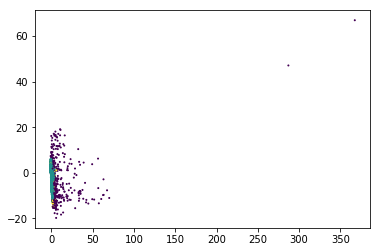

In [20]:
x = Q8_coo.reductions['PCA90'].iloc[:,0]
y = Q8_coo.reductions['PCA90'].iloc[:,1]

plt.scatter(x,y,c=labels,s=1)

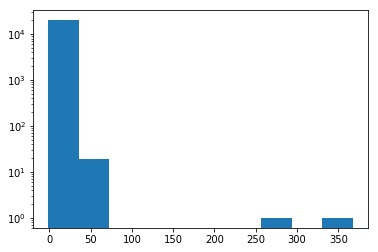

In [25]:
plt.hist(x)
plt.yscale('log')

# Plotting

In [3]:
# The built-in interactive plotting function produces a clickable plot of the data.
# Outliers (purple) and cluster edge members (orange) are scatter plotted 
# while the core cluster members are illustrated with a KDE 
# using the viridis color map (green at dense regions, purple where sparse)
# The default behavior is to produce a 2D PCA reduction for the data for plotting,
# but a reduction may be provided in the form of a pandas dataframe.
example.plot(clusterLabels=example.DB_labels)

Scaling data using StandardScaler...
Finding minimum number of dimensions to explain 90.0% of the variance...

        Dimensions: 14,
        Variance explained: 90.7%
        


/Users/Dan/anaconda3/envs/KeplerEx/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:91: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


Plotting.
window closed.


SystemExit: 

/Users/Dan/anaconda3/envs/KeplerEx/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [6]:
# Plotting using a different reduction.
pca90 = example.pca_red(df='self',red_name='PCA90',var_rat=0.9,scaled=False)
#example.save()
example.plot(df=example.reductions['PCA90'].iloc[:,[4,8]],clusterLabels=example.DB_labels,reduced=True)

Plotting.
window closed.


SystemExit: 

/Users/Dan/anaconda3/envs/KeplerEx/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [11]:
# Another example with a tsne reduction.
import quarterTools as qt
tsne = qt.tsne_fit(example.data,scaled=False)
example.plot(df=tsne,clusterLabels=example.DB_labels,reduced=True)

/Users/Dan/anaconda3/envs/KeplerEx/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
python/quarterTools.py:91: DataConversionWarning: Data with input dtype float64, object were all converted to float64 by StandardScaler.
  scaled_data = scaler.transform(data)


[t-SNE] Computing 75 nearest neighbors...
[t-SNE] Indexed 247 samples in 0.001s...
[t-SNE] Computed neighbors for 247 samples in 0.014s...
[t-SNE] Computed conditional probabilities for sample 247 / 247
[t-SNE] Mean sigma: 1.793541
[t-SNE] KL divergence after 250 iterations with early exaggeration: 61.415009
[t-SNE] KL divergence after 850 iterations: 0.440751
Plotting.
window closed.


SystemExit: 

/Users/Dan/anaconda3/envs/KeplerEx/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3304: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


# Catalog comparison

Once objects have been scored or clustered, they should be compared against existing databases of known phenomena to identify overlap. This will help identify what sort of outliers have been found, whether they are part of known rare types, extreme examples of common types, data anomalies, or something else.

Given the necessity of other databases, this example is limited to the above analysis.

Ugh, I'm trying to find a way to use the lightcurve data without downloading the data permanently. I want to download only the data I need and have it be released as soon as I'm done with it, but the work below just downloads the data and would require cleaned up later. Maybe this is the framework I have to work with but I don't like it.

In [1]:
%matplotlib notebook
from astropy.io import fits
from astropy.table import Table 
import matplotlib.pyplot as plt
from astroquery.mast import Mast
from astroquery.mast import Observations

In [4]:
tabbyObs = Observations.query_criteria(target_name='kplr008462852', obs_collection='Kepler')

In [8]:
tabbyProds = Observations.get_product_list(tabbyObs)

In [11]:
tabbyLLCs = Observations.filter_products(tabbyProds,extension='llc.fits')

In [12]:
Observations.download_products(tabbyLLCs, mrp_only = False, cache = False)

Local Path,Status,Message,URL
str95,str8,object,object
./mastDownload/Kepler/kplr008462852_lc_Q111111111111111111/kplr008462852-2009131105131_llc.fits,COMPLETE,None,None
./mastDownload/Kepler/kplr008462852_lc_Q111111111111111111/kplr008462852-2009166043257_llc.fits,COMPLETE,None,None
./mastDownload/Kepler/kplr008462852_lc_Q111111111111111111/kplr008462852-2009259160929_llc.fits,COMPLETE,None,None
./mastDownload/Kepler/kplr008462852_lc_Q111111111111111111/kplr008462852-2009350155506_llc.fits,COMPLETE,None,None
./mastDownload/Kepler/kplr008462852_lc_Q111111111111111111/kplr008462852-2010078095331_llc.fits,COMPLETE,None,None
./mastDownload/Kepler/kplr008462852_lc_Q111111111111111111/kplr008462852-2010174085026_llc.fits,COMPLETE,None,None
./mastDownload/Kepler/kplr008462852_lc_Q111111111111111111/kplr008462852-2010265121752_llc.fits,COMPLETE,None,None
./mastDownload/Kepler/kplr008462852_lc_Q111111111111111111/kplr008462852-2010355172524_llc.fits,COMPLETE,None,None
./mastDownload/Kepler/kplr008462852_lc_Q111111111111111111/kplr008462852-2011073133259_llc.fits,COMPLETE,None,None
